<a href="https://colab.research.google.com/github/anastasiia-vsk/Start-into-ML/blob/main/%D0%92%D0%B0%D1%81%D1%8C%D0%BA%D0%BE_A%2C_%D1%84%D1%96%D1%82_4_10%2C_%D0%BF%D1%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторна робота 2.
### Аналіз даних. Бібліотека Pandas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Завдання 1


In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

In [5]:
tables = pd.read_html(url)
df = tables[2]

1. Вивести 5 перших рядків


In [6]:
df.head(5)

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

2. Визначити розмір датасета

In [7]:
df.shape

(210, 7)

3. Визначити оптимальну кількість стовпців датасета

In [8]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [9]:
len(df.columns)

7

4. Змінити назви стовпців на більш зручні

In [10]:
new_col = ['Country', 'IMF_Forecast', 'IMF_Year', 'WorldBank_Estimate', 'WorldBank_Year', 'UN_Estimate', 'UN_Year']
df.columns = new_col
df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [11]:
df = df.rename(columns = {
    'IMF_Forecast' : 'MVF_2024',
    'WorldBank_Estimate' : 'WorldBank_2023',
    'UN_Estimate' : 'OON_2022'
})

df.drop(columns = ['IMF_Year', 'WorldBank_Year', 'UN_Year'], inplace = True)
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


5. Визначити тип даних датасета

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         210 non-null    object
 1   MVF_2024        210 non-null    object
 2   WorldBank_2023  210 non-null    object
 3   OON_2022        210 non-null    object
dtypes: object(4)
memory usage: 6.7+ KB


У датасеті маємо числові дані, окрім стовпця Country, але типи даних object, тому потрібно змінити на числові "float64"

In [21]:
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors = 'coerce')

df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors = 'coerce')

df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors = 'coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         210 non-null    object 
 1   MVF_2024        195 non-null    float64
 2   WorldBank_2023  202 non-null    float64
 3   OON_2022        209 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.7+ KB


6. Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.

In [15]:
df.replace('—', np.nan, inplace = True)

df.isna().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1


In [16]:
df = df.fillna(df.mean(numeric_only = True), axis = 0)

7. Ще раз перевірити


In [22]:
df.isna().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [18]:
df.duplicated().sum()

0

9. Вивести описову статистику датасету describe()

In [20]:
df.describe().round()

,MVF_2024,WorldBank_2023,OON_2022
count,210.0,210.0,210.0
mean,1123228.0,1037206.0,961270.0
std,7900707.0,7602076.0,7275608.0
min,66.0,62.0,59.0
25%,14648.0,10442.0,8928.0
50%,62158.0,43416.0,32102.0
75%,436636.0,337659.0,241248.0
max,109529216.0,105435540.0,100834796.0


10. Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповіді)?



In [ ]:
df['Difference_2024_2023'] = (df['MVF_2024'] - df['WorldBank_2023']).round()

In [ ]:

df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022,Difference_2024_2023
0,World,109529216.0,105435540.0,100834796.0,4093676.0
1,United States,28781083.0,27360935.0,25744100.0,1420148.0
2,China,18532633.0,17794782.0,17963170.0,737851.0
3,Germany,4591100.0,4456081.0,4076923.0,135019.0
4,Japan,4110452.0,4212945.0,4232173.0,-102493.0


In [ ]:
largest_diff = df.nlargest(5, 'Difference_2024_2023')
largest_diff

,Country,MVF_2024,WorldBank_2023,OON_2022,Difference_2024_2023
0,World,1.095292e+08,105435540.0,100834796.0,4093676.0
1,United States,2.878108e+07,27360935.0,25744100.0,1420148.0
196,Turks and Caicos Islands,1.123228e+06,1402.0,1138.0,1121826.0
193,Sint Maarten,1.123228e+06,1623.0,1572.0,1121605.0
178,Curaçao,1.123228e+06,3074.0,3075.0,1120154.0


Країни, для яких відрізняються показники: United States, Turks and Caicos Islands, Sint Maarten, Curaçao

11. Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?


In [24]:
selected_cols = ['MVF_2024', 'WorldBank_2023', 'OON_2022']

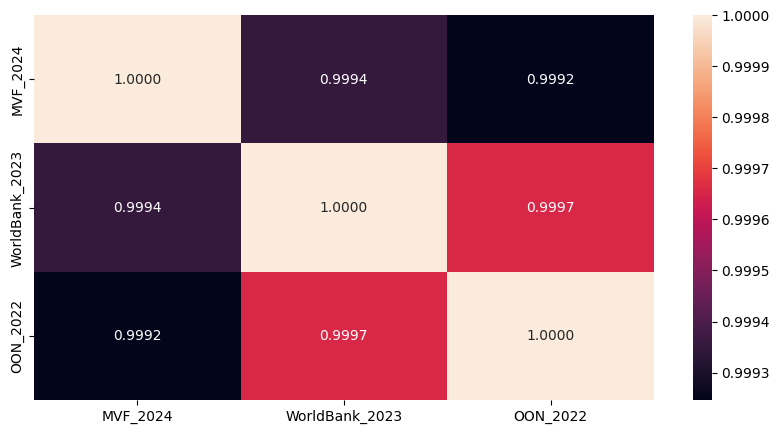

In [26]:
corr_data = df[selected_cols].corr()

plt.figure(figsize = (10, 5))
sns.heatmap(data = corr_data, annot = True, cbar = True, fmt='.4f')
plt.show()

In [27]:
highest_cor = corr_data.unstack().sort_values(ascending = False)
highest_cor = highest_cor[highest_cor < 1].head(1)

print(f"Пара з найвищою кореляцією:\n{highest_cor}")

Пара з найвищою кореляцією:
WorldBank_2023  OON_2022    0.999656
dtype: float64


12. Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?

In [28]:
print(f"З кожним роком середнє значення збільшується: \n{df[selected_cols].mean().round()}")

З кожним роком середнє значення збільшується: 
MVF_2024          1123228.0
WorldBank_2023    1037206.0
OON_2022           961270.0
dtype: float64


13. Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?

In [29]:
std_dev = df[selected_cols].std(axis=1).round()
df['std_dev'] = std_dev
df_sorted = df.sort_values(by='std_dev', ascending=False)
df_sorted.head(10)

,Country,MVF_2024,WorldBank_2023,OON_2022,std_dev
0,World,1.095292e+08,105435540.0,100834796.0,4349674.0
1,United States,2.878108e+07,27360935.0,25744100.0,1519553.0
196,Turks and Caicos Islands,1.123228e+06,1402.0,1138.0,647763.0
193,Sint Maarten,1.123228e+06,1623.0,1572.0,647573.0
178,Curaçao,1.123228e+06,3074.0,3075.0,646721.0
176,Greenland,1.123228e+06,3236.0,2926.0,646717.0
166,French Polynesia,1.123228e+06,5815.0,5814.0,645139.0
164,Cayman Islands,1.123228e+06,6601.0,6281.0,644777.0
160,Liechtenstein,1.123228e+06,7365.0,7757.0,644130.0
161,Bermuda,1.123228e+06,7828.0,7546.0,644058.0


CША має найвищу варіативність у показниках між роками

14. Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).

In [30]:
df_filtered = df[df['Country'] != 'World']
for year in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    max_country = df_filtered.loc[df_filtered[year].idxmax(), 'Country']
    min_country = df_filtered.loc[df_filtered[year].idxmin(), 'Country']
    print(f"Для {year}:")
    print(f"- Країна з максимальним показником: {max_country}")
    print(f"- Країна з мінімальним показником: {min_country}")

Для MVF_2024:
- Країна з максимальним показником: United States
- Країна з мінімальним показником: Tuvalu
Для WorldBank_2023:
- Країна з максимальним показником: United States
- Країна з мінімальним показником: Tuvalu
Для OON_2022:
- Країна з максимальним показником: United States
- Країна з мінімальним показником: Tuvalu


15. Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?

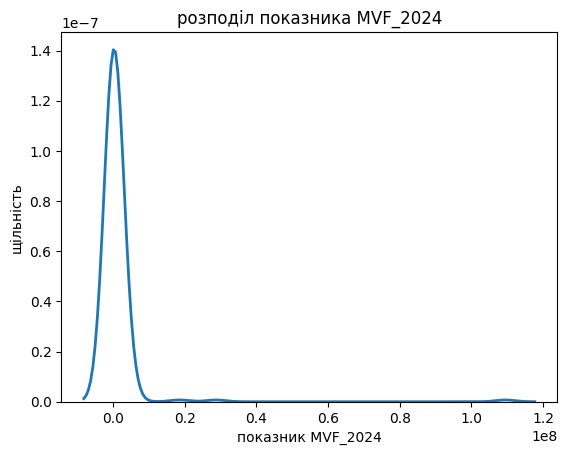

In [31]:
sns.kdeplot(data = df, x = 'MVF_2024', fill = False, linewidth=2)
plt.xlabel('показник MVF_2024')
plt.ylabel('щільність')
plt.title('розподіл показника MVF_2024')

plt.show()

РОЗПОДІЛ СКОШЕНИЙ ВПРАВО

Більшість країн мають значення показника MVF_2024 до 0.1. Розкид маємо від 0 до 1.2

16. Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?

In [35]:
df = df[df['Country'] != 'World']

total_mvf = df['MVF_2024'].sum()
total_wb  = df['WorldBank_2023'].sum()
total_oon = df['OON_2022'].sum()

df['MVF_share'] = df['MVF_2024'] / total_mvf
df['WB_share']  = df['WorldBank_2023'] / total_wb
df['OON_share'] = df['OON_2022'] / total_oon

for index, row in df.iterrows():
    print(f"{row['Country'].upper()}")
    print(f"частка у ВВП за МВФ 2024: {row['MVF_share']:.2%}")
    print(f"частка у ВВП за Світовим банком 2023: {row['WB_share']:.2%}")
    print(f"частка у ВВП за ООН 2022: {row['OON_share']:.2%}")
    print("\n")

UNITED STATES
частка у ВВП за МВФ 2024: 22.78%
частка у ВВП за Світовим банком 2023: 24.35%
частка у ВВП за ООН 2022: 25.48%


CHINA
частка у ВВП за МВФ 2024: 14.67%
частка у ВВП за Світовим банком 2023: 15.83%
частка у ВВП за ООН 2022: 17.78%


GERMANY
частка у ВВП за МВФ 2024: 3.63%
частка у ВВП за Світовим банком 2023: 3.97%
частка у ВВП за ООН 2022: 4.04%


JAPAN
частка у ВВП за МВФ 2024: 3.25%
частка у ВВП за Світовим банком 2023: 3.75%
частка у ВВП за ООН 2022: 4.19%


INDIA
частка у ВВП за МВФ 2024: 3.12%
частка у ВВП за Світовим банком 2023: 3.16%
частка у ВВП за ООН 2022: 3.43%


UNITED KINGDOM
частка у ВВП за МВФ 2024: 2.77%
частка у ВВП за Світовим банком 2023: 2.97%
частка у ВВП за ООН 2022: 3.06%


FRANCE
частка у ВВП за МВФ 2024: 2.48%
частка у ВВП за Світовим банком 2023: 2.70%
частка у ВВП за ООН 2022: 2.75%


BRAZIL
частка у ВВП за МВФ 2024: 1.85%
частка у ВВП за Світовим банком 2023: 1.93%
частка у ВВП за ООН 2022: 1.90%


ITALY
частка у ВВП за МВФ 2024: 1.84%
частка 

17. Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь)?

In [36]:
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022,std_dev,MVF_share,WB_share,OON_share
1,United States,28781083.0,27360935.0,25744100.0,1519553.0,0.227791,0.243473,0.254812
2,China,18532633.0,17794782.0,17963170.0,386667.0,0.146679,0.158348,0.177797
3,Germany,4591100.0,4456081.0,4076923.0,266574.0,0.036337,0.039653,0.040353
4,Japan,4110452.0,4212945.0,4232173.0,65435.0,0.032533,0.037489,0.041889
5,India,3937011.0,3549919.0,3465541.0,251411.0,0.031160,0.031589,0.034301


In [39]:
cols = ['MVF_2024', 'WorldBank_2023', 'OON_2022']
df_to_use = df[['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']]
df_to_use = df_to_use.head(10)

In [42]:
df_long = df_to_use.melt(id_vars = "Country", var_name = "Year", value_name = "Value")

fig = px.bar(df_long, x = "Country", y = "Value",
             color = "Year", barmode = "group",
             title = "Зміни в показниках для ТОП-10 країн за три роки")

fig.update_layout(width = 600, height = 400)

fig.show()

Показують стабільне зростання: USA, Germany, UK, France, Italy, Сanada

Висновки:

У лабораторній роботі я попрацювала із бібліотеками pandas, seaborn, plotly, пригадала як працювати з датафреймами, зчитувати таблиці з вебсайтів, аналізувати їх, робити візуалізації.

## Завдання 2

1. Вивести перших 5 рядків

In [ ]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


2. Визначити розмір датасета

In [ ]:
df_titanic.shape

(418, 12)

3. Визначити тип даних

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df_titanic.Ticket.unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

Типи даних всюди правильні.

4. Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення

In [ ]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Стовпці 'Age' та 'Fare' мають числовий тип даних тому пропущенні значення можна замінити просто на середнє, а стовпець 'Cabin' має майже 80% пропущених значень, тому я думаю треба видалити даний стовпець

In [ ]:
df_titanic['Age'].fillna(df_titanic['Age'].mean(skipna = True), inplace = True)
df_titanic['Fare'].fillna(df_titanic['Fare'].mean(skipna = True), inplace = True)
df_titanic.drop('Cabin', axis = 1, inplace = True)

5. Ще раз перевіряємо

In [ ]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

6. Перевірити наявність дублікатів. При наявності видалити дублікати

In [ ]:
df_titanic.duplicated().sum()

0

Дублікатів немає

7. Вивести описову статистику датасету describe()

In [ ]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


8. Видалити стовпчик Cabin - вже був відсутній

9. Сформувати датасет з обраними стовпцями: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']

In [ ]:
cols_to_use = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_titanic_to_use = df_titanic[cols_to_use]
df_titanic_to_use.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


10. Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика)

In [ ]:
df_titanic_to_use.Sex.unique()
df_titanic_to_use['Sex'] = df_titanic_to_use['Sex'].map({'male' : 0, 'female': 1})

C:\Users\prplct\AppData\Local\Temp\ipykernel_11804\4267319936.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_titanic_to_use.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


11.  Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає)

In [ ]:
df_titanic_to_use.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

12. Вивести 5 перших рядків датасету

In [ ]:
df_titanic_to_use.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


13. Вивести 5 останніх рядків датасету

In [ ]:
df_titanic_to_use.tail()

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500
417,0,3,0,30.27259,22.3583


14. Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?

In [ ]:
survived_female = df_titanic_to_use.query('Survived == 1 and Sex == 1')
survived_female_perc = survived_female['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

survived_male = df_titanic_to_use.query('Survived == 1 and Sex == 0')
survived_male_perc = survived_male['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

print(f'Відсоток виживання серед жінок: {survived_female_perc} %')
print(f'Відсоток виживання серед чоловіків: {survived_male_perc} %')

Відсоток виживання серед жінок: 36.36363636363637 %
Відсоток виживання серед чоловіків: 0.0 %


15. Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?

In [ ]:
df_titanic_to_use.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [ ]:
survived_pclass_1 = df_titanic_to_use.query('Survived == 1 and Pclass == 1')
survived_pclass_1_perc = survived_pclass_1['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100
survived_pclass_2 = df_titanic_to_use.query('Survived == 1 and Pclass == 2')
survived_pclass_2_perc = survived_pclass_2['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100
survived_pclass_3 = df_titanic_to_use.query('Survived == 1 and Pclass == 3')
survived_pclass_3_perc = survived_pclass_3['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

print(f'Відсоток виживання серед класу 1: {survived_pclass_1_perc} %')
print(f'Відсоток виживання серед класу 2: {survived_pclass_2_perc} %')
print(f'Відсоток виживання серед класу 3: {survived_pclass_3_perc} %')

Відсоток виживання серед класу 1: 11.961722488038278 %
Відсоток виживання серед класу 2: 7.177033492822966 %
Відсоток виживання серед класу 3: 17.22488038277512 %


Третій клас має найвищий рівень виживання

16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи впливає вік на виживання (дати відповідь)?

In [ ]:
df_titanic_to_use[df_titanic_to_use['Survived'] == 1]
df_titanic_to_use[df_titanic_to_use['Survived'] == 0]

mean_age_survived = df_titanic_to_use[df_titanic_to_use['Survived'] == 1].Age.mean()
mean_age_not_survived = df_titanic_to_use[df_titanic_to_use['Survived'] == 0].Age.mean()

print(f'Середній вік людей, які вижили: {mean_age_survived}')
print(f'Середній вік людей, які не вижили: {mean_age_not_survived}')

Середній вік людей, які вижили: 30.27239973050095
Середній вік людей, які не вижили: 30.272699293414263


Тут можна було б додати тест на стат.значимість, мабуть :)

Проте наразі не можу сказати, що вік впливає

17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи. Як тариф впливав на шанси виживання (дати відповідь)?

In [ ]:
df_titanic_to_use.Fare.describe()

count    418.000000
mean      35.627188
std       55.840500
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
df_titanic_to_use['Fare_group'] = pd.qcut(df_titanic_to_use['Fare'],
                                          q = 4,
                                          labels = ['Low', 'Medium-Low', 'Medium-High', 'High'])

C:\Users\prplct\AppData\Local\Temp\ipykernel_11804\2078008878.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_titanic_to_use.Fare_group.value_counts()

Fare_group
Low            114
Medium-High    105
High           103
Medium-Low      96
Name: count, dtype: int64

In [ ]:
survived_fare_low      = df_titanic_to_use.query('Fare_group == "Low" and Survived == 1')
survived_fare_low_perc = survived_fare_low['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100
survived_fare_medium_low      = df_titanic_to_use.query('Fare_group == "Medium-Low" and Survived == 1')
survived_fare_medium_low_perc = survived_fare_medium_low['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100
survived_fare_medium_high      = df_titanic_to_use.query('Fare_group == "Medium-High" and Survived == 1')
survived_fare_medium_high_perc = survived_fare_medium_high['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100
survived_fare_high      = df_titanic_to_use.query('Fare_group == "High" and Survived == 1')
survived_fare_high_perc = survived_fare_high['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

print(f'Відсоток виживання серед групи Low: {survived_fare_low_perc} %')
print(f'Відсоток виживання серед групи Medium-Low: {survived_fare_medium_low_perc} %')
print(f'Відсоток виживання серед групи Medium-High: {survived_fare_medium_high_perc} %')
print(f'Відсоток виживання серед групи High: {survived_fare_high_perc} %')

Відсоток виживання серед групи Low: 7.177033492822966 %
Відсоток виживання серед групи Medium-Low: 6.220095693779904 %
Відсоток виживання серед групи Medium-High: 9.808612440191387 %
Відсоток виживання серед групи High: 13.157894736842104 %


Висновок: чим дорожчий тариф, тим більше було шансів  на виживання.

18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?

In [ ]:
df_titanic_to_use.Pclass.unique()
mean_fare_class_1 = df_titanic_to_use.query('Pclass == 1')['Fare'].mean()
mean_fare_class_2 = df_titanic_to_use.query('Pclass == 2')['Fare'].mean()
mean_fare_class_3 = df_titanic_to_use.query('Pclass == 3')['Fare'].mean()

print(f'Середнє значення тарифу для класу 1: {mean_fare_class_1.round(2)}')
print(f'Середнє значення тарифу для класу 2: {mean_fare_class_2.round(2)}')
print(f'Середнє значення тарифу для класу 3: {mean_fare_class_3.round(2)}')

Середнє значення тарифу для класу 1: 94.28
Середнє значення тарифу для класу 2: 22.2
Середнє значення тарифу для класу 3: 12.57


##### Чим нижчий клас тим дешевший тариф

19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік пасажирів розподіляється за класами (дати відповідь)?

In [ ]:
mean_age_class_1 = df_titanic_to_use.query('Pclass == 1')['Age'].mean()
mean_age_class_2 = df_titanic_to_use.query('Pclass == 2')['Age'].mean()
mean_age_class_3 = df_titanic_to_use.query('Pclass == 3')['Age'].mean()

print(f'Середнє значення віку для класу 1: {mean_age_class_1.round(2)}')
print(f'Середнє значення віку для класу 2: {mean_age_class_2.round(2)}')
print(f'Середнє значення віку для класу 3: {mean_age_class_3.round(2)}')

Середнє значення віку для класу 1: 40.02
Середнє значення віку для класу 2: 28.86
Середнє значення віку для класу 3: 26.09


##### Висновок: чим старша людина, тим вищий клас вона вибирає. Це може бути пов’язано з тим, що з віком доходи зазвичай зростають, що дозволяє придбати квитки більш високого класу.

20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив. Чи є видимі відмінності у вікових групах (дати відповідь)?

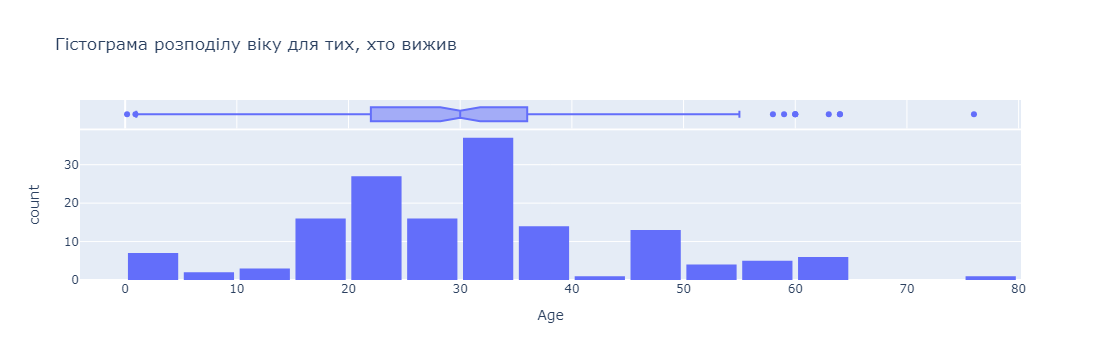

In [ ]:
fig = px.histogram(df_titanic_to_use[df_titanic_to_use['Survived'] == 1],
                   x = 'Age',
                   marginal = 'box',
                   title = 'Гістограма розподілу віку для тих, хто вижив')

fig.update_layout(bargap=0.1)

fig.show()

##### Найбільше людей які вижили мали вік 30-34 роки, а найменше 40-44 та 75-79

21. Обчисліть відсоток виживання для кожної комбінації статі та класу (наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група мала найвищий рівень виживання (дати відповідь)?

In [ ]:
survived = df_titanic_to_use[df_titanic_to_use['Survived'] == 1]

female_class_1      = survived.query('Sex == 1 and Pclass == 1')
female_class_1_perc = female_class_1['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100
female_class_2      = survived.query('Sex == 1 and Pclass == 2')
female_class_2_perc = female_class_2['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100
female_class_3      = survived.query('Sex == 1 and Pclass == 3')
female_class_3_perc = female_class_3['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

male_class_1      = survived.query('Sex == 0 and Pclass == 1')
male_class_1_perc = male_class_1['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100
male_class_2      = survived.query('Sex == 0 and Pclass == 2')
male_class_2_perc = male_class_2['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100
male_class_3      = survived.query('Sex == 0 and Pclass == 3')
male_class_3_perc = male_class_3['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100


print(f'Відсоток виживання серед жінок класу 1: {female_class_1_perc} %')
print(f'Відсоток виживання серед жінок класу 2: {female_class_2_perc} %')
print(f'Відсоток виживання серед жінок класу 3: {female_class_3_perc} %')

print(f'Відсоток виживання серед чоловіків класу 1: {male_class_1_perc} %')
print(f'Відсоток виживання серед чоловіків класу 2: {male_class_2_perc} %')
print(f'Відсоток виживання серед чоловіків класу 3: {male_class_3_perc} %')

Відсоток виживання серед жінок класу 1: 11.961722488038278 %
Відсоток виживання серед жінок класу 2: 7.177033492822966 %
Відсоток виживання серед жінок класу 3: 17.22488038277512 %
Відсоток виживання серед чоловіків класу 1: 0.0 %
Відсоток виживання серед чоловіків класу 2: 0.0 %
Відсоток виживання серед чоловіків класу 3: 0.0 %


##### Серед жінок найбільше виживших у найнижчому (3) класі. Серед чоловіків виживших немає взагалі

22. Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare). Які змінні найбільш сильно корелюють з виживанням (дати відповідь)?

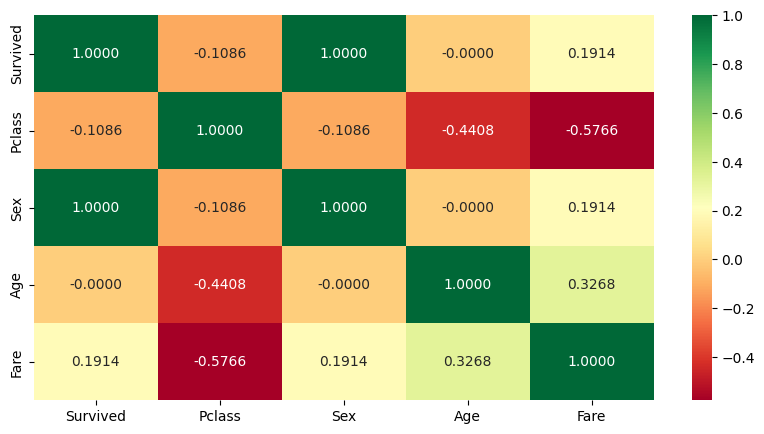

In [ ]:
cols_for_corr = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
corr_data_titanic = df_titanic_to_use[cols_for_corr].corr()

plt.figure(figsize = (10, 5))
sns.heatmap(data = corr_data_titanic, annot = True, cmap = "RdYlGn", cbar = True, fmt='.4f')
plt.show()

In [ ]:
highest_correlation = corr_data_titanic.unstack().sort_values(ascending = False)
highest_correlation = highest_correlation[highest_correlation < 1].head(20)

print(f"Пара з найвищою кореляцією:\n{highest_correlation}")

Пара з найвищою кореляцією:
Fare      Age         0.326800
Age       Fare        0.326800
Sex       Fare        0.191382
Fare      Sex         0.191382
          Survived    0.191382
Survived  Fare        0.191382
Age       Sex        -0.000011
          Survived   -0.000011
Sex       Age        -0.000011
Survived  Age        -0.000011
          Pclass     -0.108615
Pclass    Survived   -0.108615
Sex       Pclass     -0.108615
Pclass    Sex        -0.108615
Age       Pclass     -0.440782
Pclass    Age        -0.440782
          Fare       -0.576619
Fare      Pclass     -0.576619
dtype: float64


#### Із стовпцем Survived найбільше корелюють Pclass та Fare

Висновки:

- Чоловіки не вижили
- Третій клас показав найвищий відсоток виживших.